<p style="text-align: center;"> <span style="color:skyblue"> <font size="5"> <b> Neural Network vs. Linear Regression: Housing Prices Kaggle Competition Submission (Ames Housing Dataset)  </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="4"> By: Kofi Buahin </p> </b></font>

As a part of my personal independent research, I decided to enter a kaggle competition to apply some of the learnings I've developed with regards to Neural Networks over the summer. The goal of this first deliverable was to try comparing the performance of a traditional Multiple Linear Regression Model against a trained Multi-Layer Artificial Neural Network implemented for the same regression task. 

**Competition Description**:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

- Goal: Predict the sales price for each house in the dataset. For each Id in the test set, you must predict the value of the SalePrice variable. 

- Evaluation Metric: Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Data Description**:

- `SalePrice`:the property's sale price in dollars. This is the target variable that you're trying to predict.
- `MSSubClass`: The building class
- `MSZoning`: The general zoning classification
- `LotFrontage`: Linear feet of street connected to property
- `LotArea`: Lot size in square feet
- `Street`: Type of road access
- `Alley`: Type of alley access
- `LotShape`: General shape of property
- `LandContour`: Flatness of the property
- `Utilities`: Type of utilities available
- `LotConfig`: Lot configuration
- `LandSlope`: Slope of property
- `Neighborhood`: Physical locations within Ames city limits
- `Condition1`: Proximity to main road or railroad
- `Condition2`: Proximity to main road or railroad (if a second is present)
- `BldgType`: Type of dwelling
- `HouseStyle`: Style of dwelling
- `OverallQual`: Overall material and finish quality
- `OverallCond`: Overall condition rating
- `YearBuilt`: Original construction date
- `YearRemodAdd`: Remodel date
- `RoofStyle`: Type of roof
- `RoofMatl`: Roof material
- `Exterior1st`: Exterior covering on house
- `Exterior2nd`: Exterior covering on house (if more than one material)
- `MasVnrType`: Masonry veneer type
- `MasVnrArea`: Masonry veneer area in square feet
- `ExterQual`: Exterior material quality
- `ExterCond`: Present condition of the material on the exterior
- `Foundation`: Type of foundation
- `BsmtQual`: Height of the basement
- `BsmtCond`: General condition of the basement
- `BsmtExposure`: Walkout or garden level basement walls
- `BsmtFinType1`: Quality of basement finished area
- `BsmtFinSF1`: Type 1 finished square feet
- `BsmtFinType2`: Quality of second finished area (if present)
- `BsmtFinSF2`: Type 2 finished square feet
- `BsmtUnfSF`: Unfinished square feet of basement area
- `TotalBsmtSF`: Total square feet of basement area
- `Heating`: Type of heating
- `HeatingQC`: Heating quality and condition
- `CentralAir`: Central air conditioning
- `Electrical`: Electrical system
- `1stFlrSF`: First Floor square feet
- `2ndFlrSF`: Second floor square feet
- `LowQualFinSF`: Low quality finished square feet (all floors)
- `GrLivArea`: Above grade (ground) living area square feet
- `BsmtFullBath`: Basement full bathrooms
- `BsmtHalfBath`: Basement half bathrooms
- `FullBath`: Full bathrooms above grade
- `HalfBath`: Half baths above grade
- `Bedroom`: Number of bedrooms above basement level
- `Kitchen`: Number of kitchens
- `KitchenQual`: Kitchen quality
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
- `Functional`: Home functionality rating
- `Fireplaces`: Number of fireplaces
- `FireplaceQu`: Fireplace quality
- `GarageType`: Garage location
- `GarageYrBlt`: Year garage was built
- `GarageFinish`: Interior finish of the garage
- `GarageCars`: Size of garage in car capacity
- `GarageArea`: Size of garage in square feet
- `GarageQual`: Garage quality
- `GarageCond`: Garage condition
- `PavedDrive`: Paved driveway
- `WoodDeckSF`: Wood deck area in square feet
- `OpenPorchSF`: Open porch area in square feet
- `EnclosedPorch`: Enclosed porch area in square feet
- `3SsnPorch`: Three season porch area in square feet
- `ScreenPorch`: Screen porch area in square feet
- `PoolArea`: Pool area in square feet
- `PoolQC`: Pool quality
- `Fence`: Fence quality
- `MiscFeature`: Miscellaneous feature not covered in other categories
- `MiscVal`: $Value of miscellaneous feature
- `MoSold`: Month Sold
- `YrSold`: Year Sold
- `SaleType`: Type of sale
- `SaleCondition`: Condition of sale

In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Pre-processing

In [379]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Combining the data for the predictor set and the training set to do joint imputation later on in the script.
df = pd.concat([df_train,df_test])
dfsales = df[['Id','SalePrice']]
df.drop(columns=['SalePrice'],inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [380]:
df_train.shape

(1460, 81)

In [381]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [382]:
# Changing the data type of MasVnrArea and GarageYrBlt in the training set primarily
df_train['MasVnrArea'].replace('NA', None , inplace=True)
df_train['GarageYrBlt'].replace('NA', None , inplace=True)

df_train[['MasVnrArea','GarageYrBlt']] = df_train[['MasVnrArea','GarageYrBlt']].apply(pd.to_numeric)
df_train[['MasVnrArea','GarageYrBlt']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrArea   1452 non-null   float64
 1   GarageYrBlt  1379 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [383]:
# Null values in both the test and training Dataset

nulls_train = pd.DataFrame(pd.isnull(df_train).sum())
nulls_train.reset_index(inplace=True)
nulls_train.rename(columns={'index':'column', 0:'null_count'},inplace=True)
nulls_train = nulls_train[nulls_train['null_count'] != 0]
nulls_train['percent_missing'] = ["{:.2f}%".format(x/len(df_train)*100) for x in nulls_train.null_count]
nulls_train.sort_values(by='null_count',ascending=False)


,column,null_count,percent_missing
72,PoolQC,1453,99.52%
74,MiscFeature,1406,96.30%
6,Alley,1369,93.77%
73,Fence,1179,80.75%
57,FireplaceQu,690,47.26%
3,LotFrontage,259,17.74%
58,GarageType,81,5.55%
59,GarageYrBlt,81,5.55%
60,GarageFinish,81,5.55%
63,GarageQual,81,5.55%


There were some data points in the Dataset that were entered in the raw CSV as "NA" and therefore were loaded in pandas as nulls. This cell of code below cleans this data and puts the "NA" value in on the back end here.

In [384]:
# FillNA Cell
# Adjustuing for variables that load as NaN but are actually entered as N/A in the excel spreadsheet
df_train['Fence'].fillna('NA',inplace = True)
df_train['MiscFeature'].fillna('NA',inplace = True)
df_train['Alley'].fillna('NA',inplace = True)
df_train['FireplaceQu'].fillna('NA',inplace = True)
df_train['GarageType'].fillna('NA',inplace = True)
df_train['BsmtFinType1'].fillna('NA',inplace = True)
df_train['BsmtFinType2'].fillna('NA',inplace = True)


Before I conducted any Exploratory data anlysis, I conducted some preliminary feature engineering based on some potentially interesting factors that could be considered in the analysis down the line. The data points I decided to add before are as follows:
- `AgeAtSale`: This data point represents the age of the house at the time of it's sale. Potentially newer houses could be more expensive than older ones.
- `LastRemodYrs`: This data point represents the difference between the last time there was a remodel and the year the house was sold in.
- `RecessionSale`: I noticed that there were a lot of sales in the Year 2008 which represented a major financial recession. This could potentially have had an impact on prices and therfore I created this data point to capture that.
- `SaleSeason`: I thought that potentially the specific time of the year when the house was sold could have an impact on the SalePrice of the house.

For now, I will carry out the feature engineering and Exploratory data analysis only on the Training Data set as the SalePrice isn't available for the test prediction set (Kaggle witholds them so people won't have answers to the problem ahead of time)

In [385]:
# Preliminary Feature Engineering (training):
df_train['AgeAtSale'] = df_train.YrSold - df_train.YearBuilt
df_train['LastRemodYrs'] = df_train.YrSold - df_train.YearRemodAdd
df_train['RecessionSale'] = [1 if x in [2008,2009] else 0 for x in df_train['YrSold']]
df_train['SaleSeason'] = df_train.MoSold.map({12:'Winter',1:'Winter',2:'Winter',
                                              3:'Spring',4:'Spring',5:'Spring',
                                              6:'Summer',7:'Summer',8:'Summer',
                                              9:'Fall',10:'Fall',11:'Fall'})

## Exploratory Data Analysis

Here, I carried out some exploratory data analysis on the categorical variables and numerical variables. 

For the categorical variables, I created boxplots to see the relationship between certain data points and the target variable in this case: Sale Price of the house. 

For the numerical values, I looked at variables that potentially had correlations with SalePrice and for any interesting inter-relations

In [386]:
from matplotlib import pyplot as plt 
import seaborn as sns

# Function to provide boxplots by categorical value
def GranularBoxplotter(yval, xval='SalePrice', df = df_train):
    plt.figure(figsize=(8,6))
    sns.boxplot(x = xval, y=yval, data=df)
    plt.title('Boxplot displaying Distribution of SalePrice by {}'.format(yval), 
            loc = 'center', 
            fontsize = 12,
            fontweight = 'bold',
            color = 'Black',
            pad = 20)
    plt.show()

### Summary Statistics

In [387]:
# Descriptive statistics for the Sales Price in the training set
pd.DataFrame( df_train['SalePrice'].describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### Visualizations by Categorical Variables:

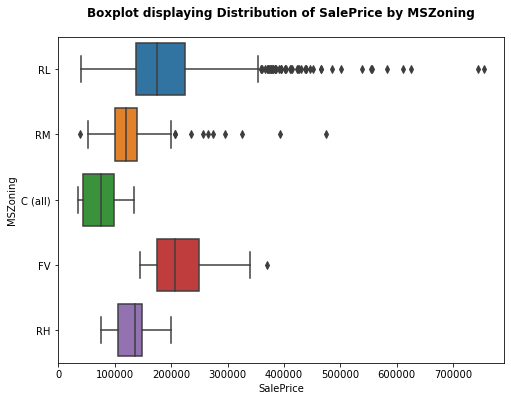

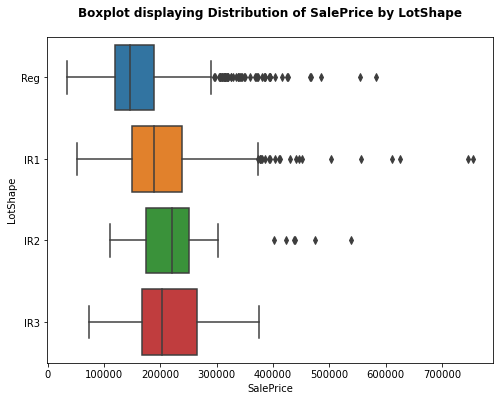

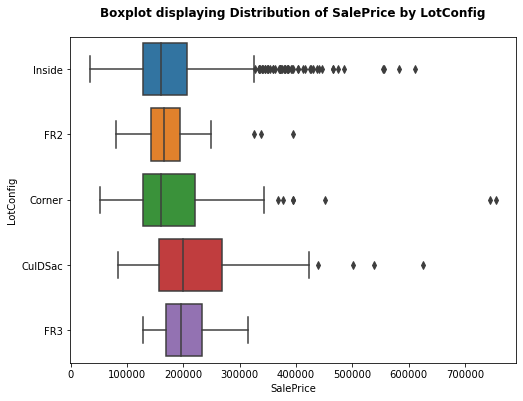

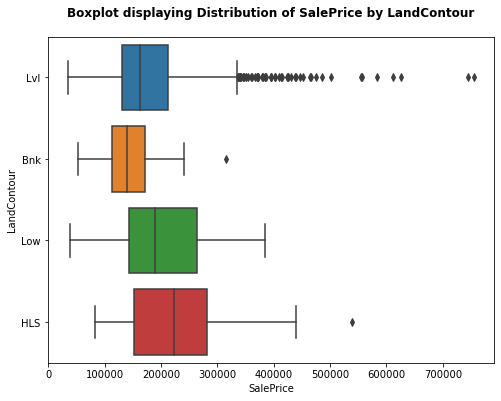

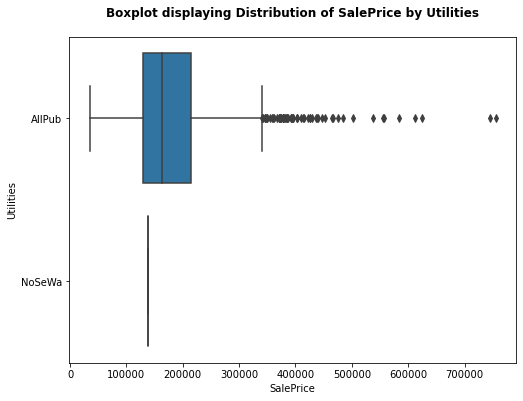

In [388]:
GranularBoxplotter('MSZoning',)
GranularBoxplotter('LotShape')
GranularBoxplotter('LotConfig')
GranularBoxplotter('LandContour')
GranularBoxplotter('Utilities')

**Key Observations:**

**`MS Zoning`**: It seems that FV/RL have slightly higher priced medians while C(All) seem to have a slightly lower

**`LotShape`**: All the irregular lot sizes seem to have a bigger price than the lots that had a regular lot shape. We can carry out further Feature Engineering – Regular vs. Irregular.

**`LandContour`**: Seems like HLS has a slightly higher median than the other options. This makes this a potential candidate to add in our linear regression. 


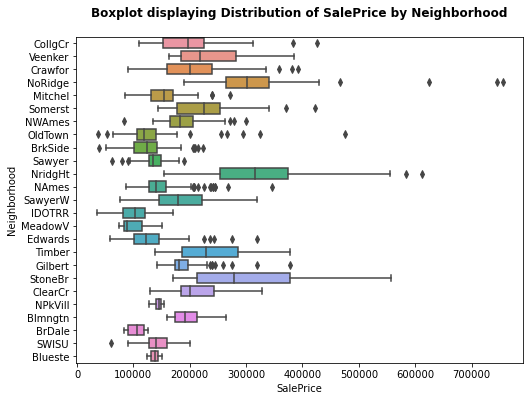

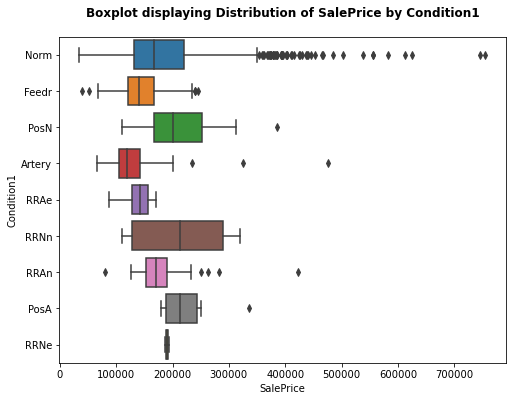

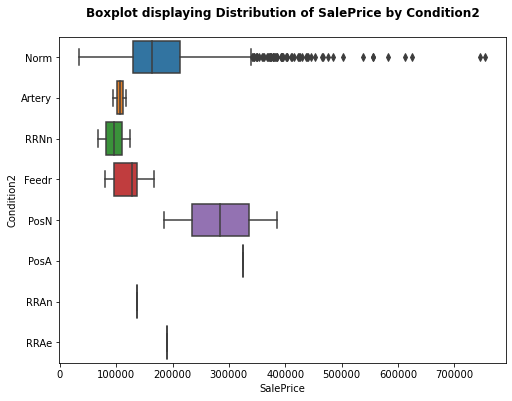

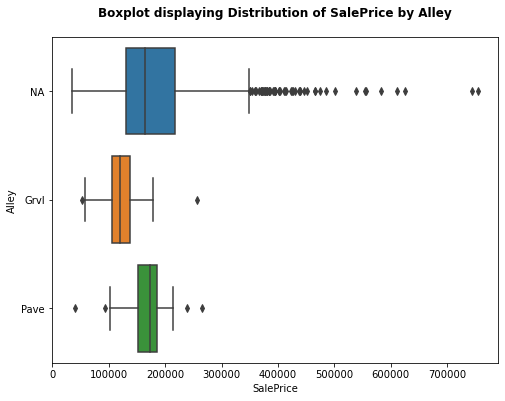

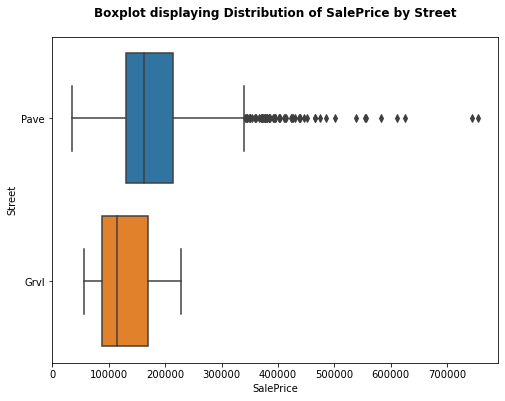

In [389]:
GranularBoxplotter('Neighborhood')
GranularBoxplotter('Condition1')
GranularBoxplotter('Condition2')
GranularBoxplotter('Alley')
GranularBoxplotter('Street')

**Key Observations**

**`Neighborhood`**: it seems that we have some houses in high value areas (StoneBr, NridgHt,NoRidge) and low value areas ( based off of eyeballing their medians from the boxplot). This might be interesting to this more further down the line in the analysis and conduct potential feature engineering.

**`Condition_2`**: it seems that houses that have a Positive off-site feature as a second condition nearby have a higher median Sale Price.

**`Street`**: Seems that Pavement as a type of road that leads into the access to the house has a higher median SalePrice. We might want to factor that in the model.


In [390]:
print('Median SalePrice in the whole training dataset is {}'.format(df_train.SalePrice.median()))

SPmedByNBH = pd.DataFrame(df_train[['Neighborhood','SalePrice']].\
    groupby(['Neighborhood']).\
        median()).\
            sort_values(by='SalePrice',ascending=False)

print('75th Percentile of SalePrice in the whole training dataset is {}'.format(df_train.SalePrice.quantile(0.75)))
display(SPmedByNBH[SPmedByNBH['SalePrice'] > df_train.SalePrice.quantile(0.75)])

print('25th Percentile of SalePrice in the whole training dataset is {}'.format(df_train.SalePrice.quantile(0.25)))
display(SPmedByNBH[SPmedByNBH['SalePrice'] < df_train.SalePrice.quantile(0.25)])



Median SalePrice in the whole training dataset is 163000.0
75th Percentile of SalePrice in the whole training dataset is 214000.0


,SalePrice
Neighborhood,
NridgHt,315000.0
NoRidge,301500.0
StoneBr,278000.0
Timber,228475.0
Somerst,225500.0
Veenker,218000.0


25th Percentile of SalePrice in the whole training dataset is 129975.0


,SalePrice
Neighborhood,
BrkSide,124300.0
Edwards,121750.0
OldTown,119000.0
BrDale,106000.0
IDOTRR,103000.0
MeadowV,88000.0


Based on this, we can definitely see that there are some high income neighborhoods and some low income neighborhoods. This may prove to be a key data point in the models later on. I will do some more feature engineering on this later on in this script.

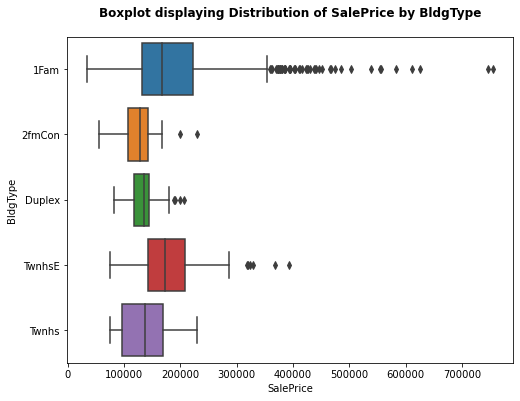

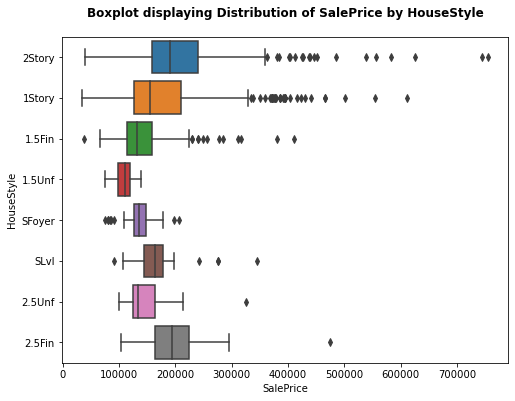

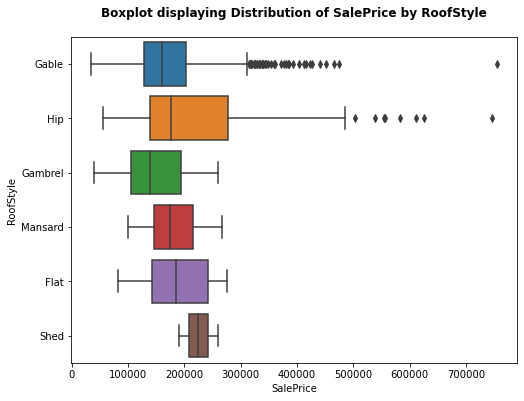

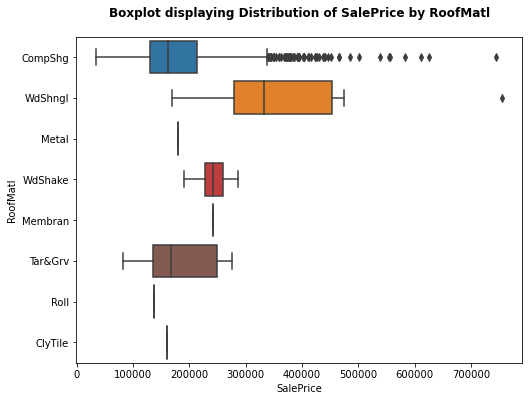

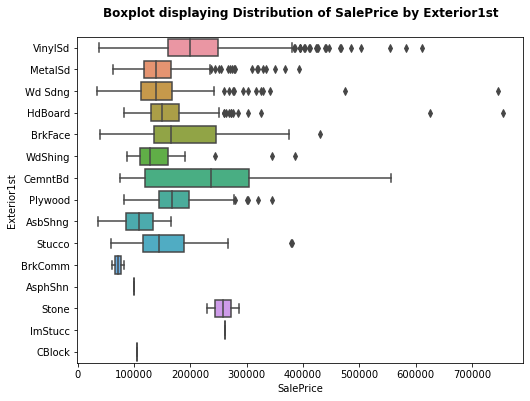

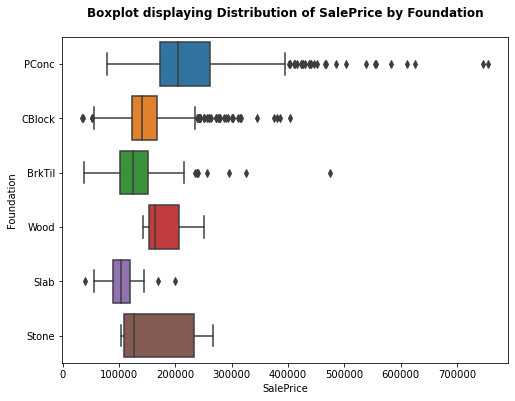

In [391]:
GranularBoxplotter('BldgType')
GranularBoxplotter('HouseStyle')
GranularBoxplotter('RoofStyle')
GranularBoxplotter('RoofMatl')
GranularBoxplotter('Exterior1st')
GranularBoxplotter('Foundation')

**Key Observations**

**`HouseStyle`**: It seems that the houses that have some element of being unfinished (1.5Unf, 2.5Unf) have a slightly lower median sale price. This might be an opportunity for some feature engineering.

**`RoofMatl`**: It seems that the houses that have a roof made out of Wood Shingles (WdShngl) have a significantly higher median. Granted there is a larger range but this might be worthwhile testing out in a model.


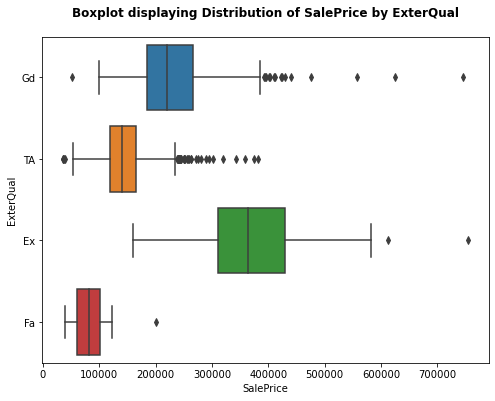

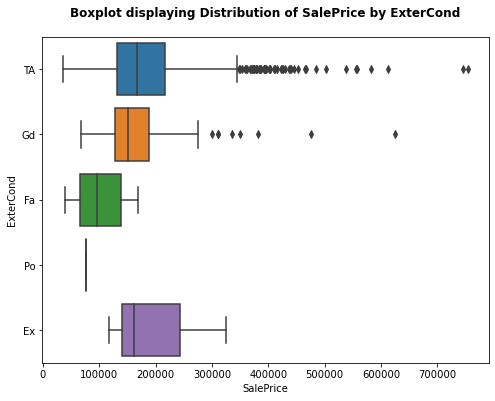

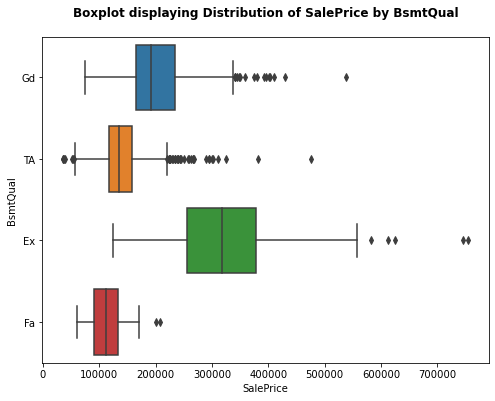

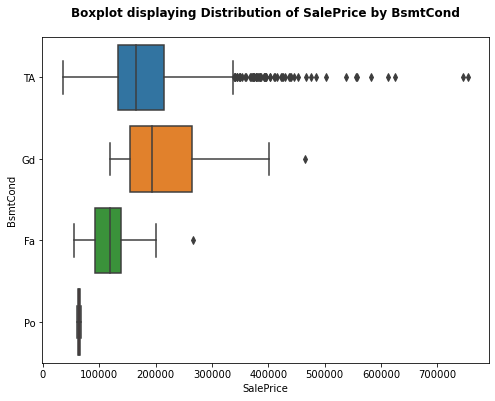

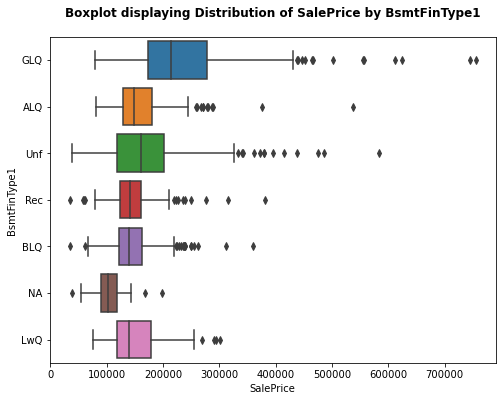

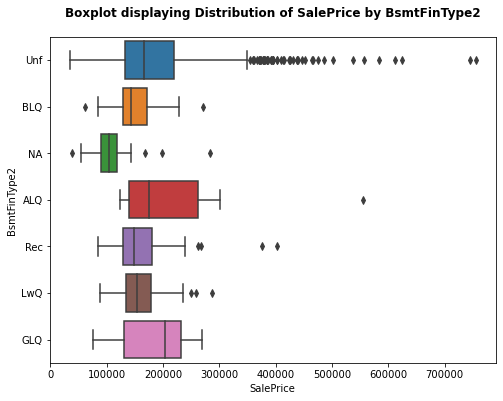

In [392]:
GranularBoxplotter('ExterQual')
GranularBoxplotter('ExterCond')
GranularBoxplotter('BsmtQual')
GranularBoxplotter('BsmtCond')
GranularBoxplotter('BsmtFinType1')
GranularBoxplotter('BsmtFinType2')

**Key Observations**:

**`ExterQual`**: It seems that an Excellent Exterior Quality has an impact on the price of the house. Another variable to watch to include in the regression Model.

**`BsmtQual`**: It seems that an Excellent Basement Quality has an impact on the price of the house. Another variable to watch to include in the regression Model.

**`BsmtCondl`**: It seems that an Excellent Basement Condition has an impact on the price of the house. Another variable to watch to include in the regression Model.

**`BsmtFinType1`**: Basements with Good Living Quarters have a higher median SalePrice so it may be worthwhile including this as a variable in the regression model.


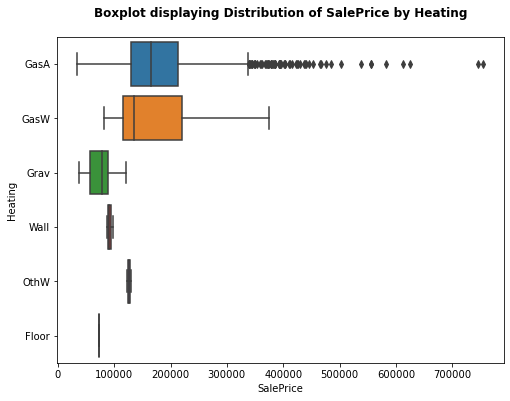

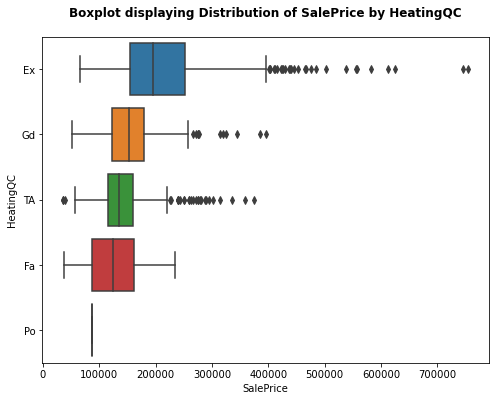

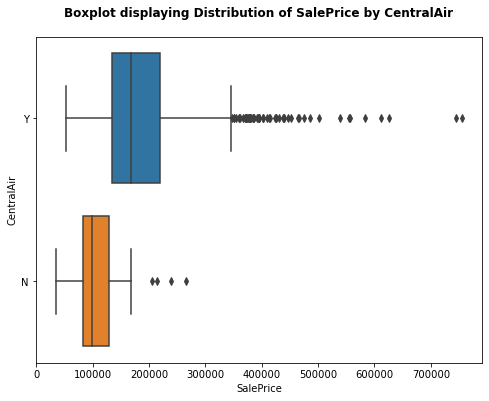

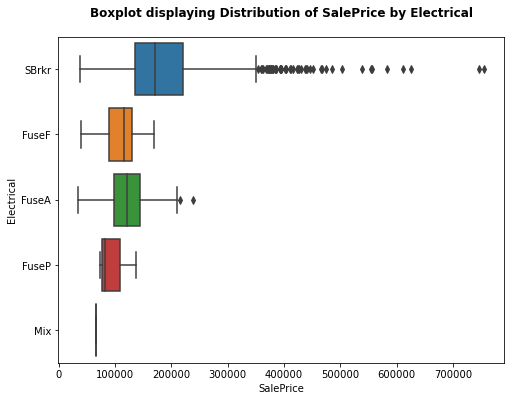

In [393]:
GranularBoxplotter('Heating')
GranularBoxplotter('HeatingQC')
GranularBoxplotter('CentralAir')
GranularBoxplotter('Electrical')

**Key Observations**:

**`HeatingQC`**: Seems like there is a clear impact of the Heating Quality and Condition on SalePrice. We might want to add this to the model as well.

**`CentralAir`**: Clear to see that there is an impact here for Central Air Conditioning. This might be something we want to pay attention for later down the line with our model.

**`Electrical`**: Clear to see that SBrkr has a higher median SalePrice than the other types of electrical.


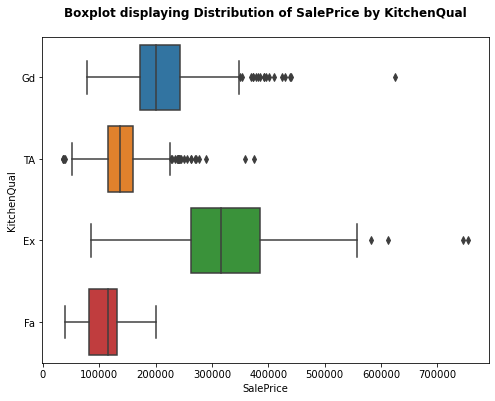

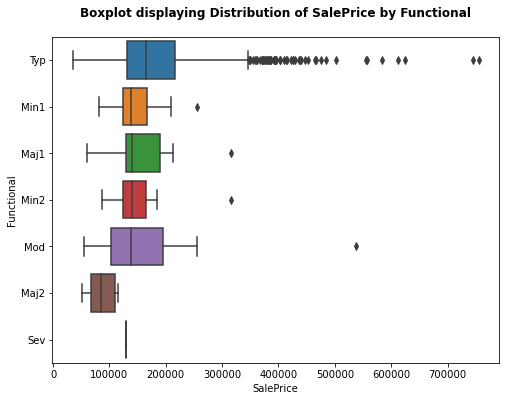

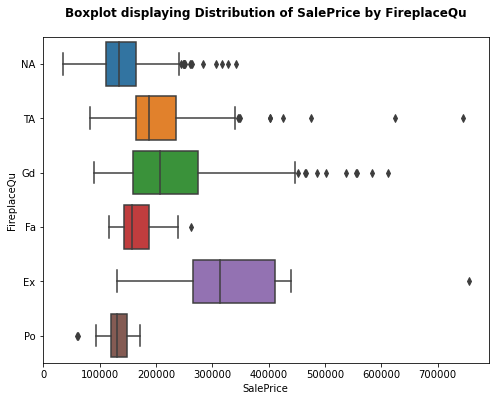

In [394]:
GranularBoxplotter('KitchenQual')
GranularBoxplotter('Functional')
GranularBoxplotter('FireplaceQu')

**Key Observations**

**`KitchenQual`**: It is clear that having a kitchen in Excellent condition is definitely a factor in SalePrice

**`Functional`**: it seems like Maj2 has an impact on the SalePrice of the house.

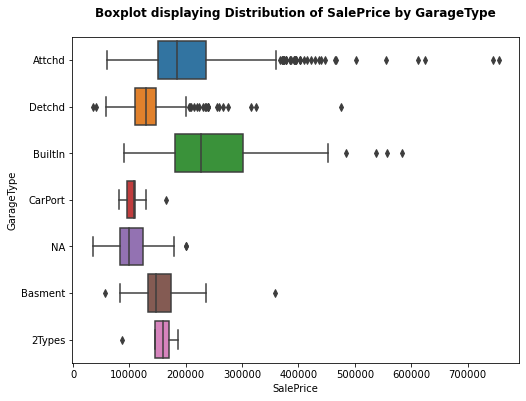

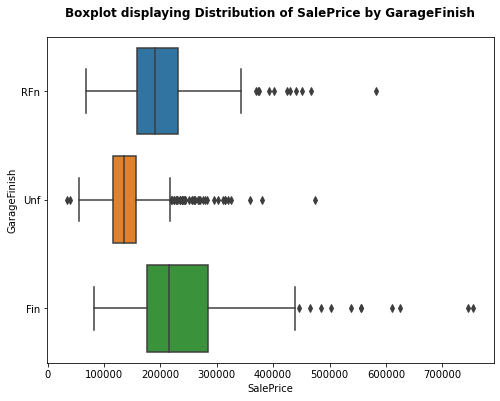

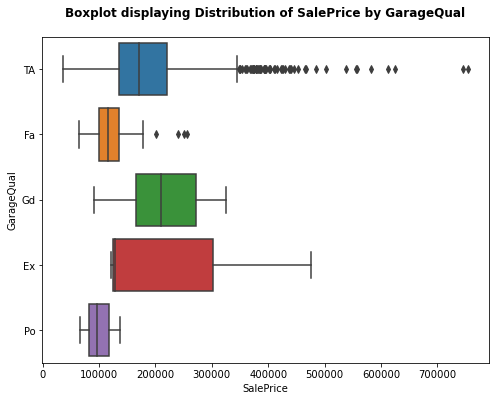

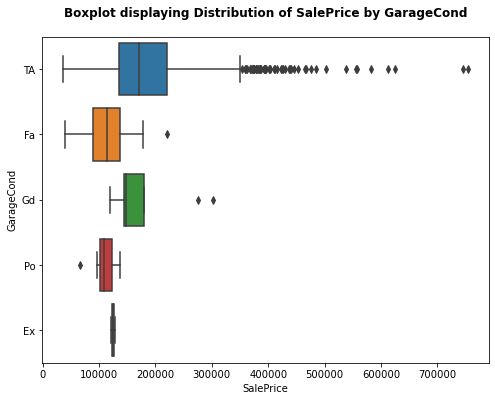

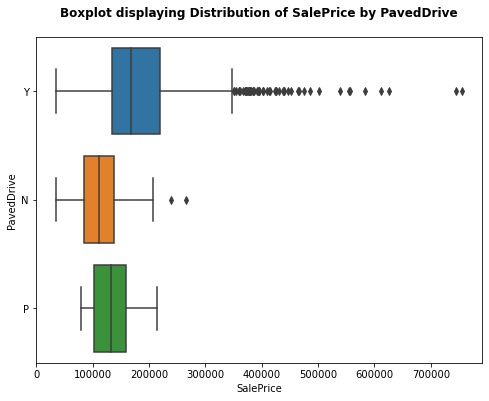

In [395]:
GranularBoxplotter('GarageType')
GranularBoxplotter('GarageFinish')
GranularBoxplotter('GarageQual')
GranularBoxplotter('GarageCond')
GranularBoxplotter('PavedDrive')

**Key Observations**

Key to note that it seems that whether or not a house has a Garage or not could be a key consideration here as well. We will therefore Feature Engineer to create a binary variable to factor this in.


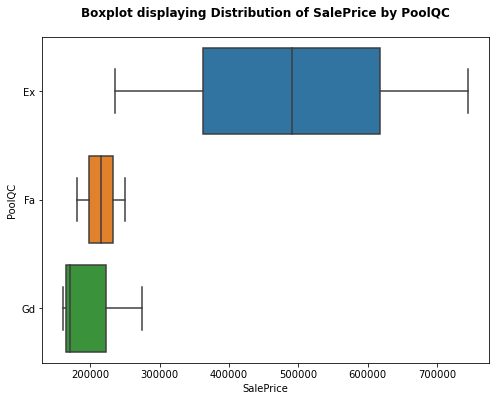

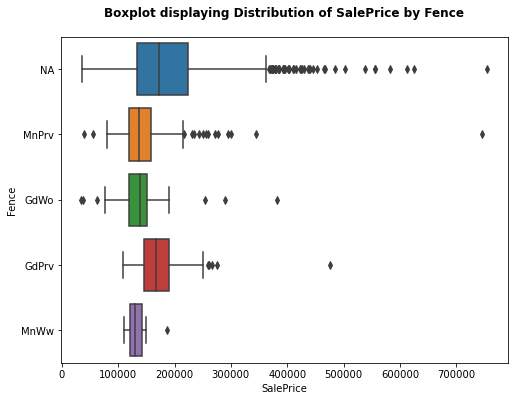

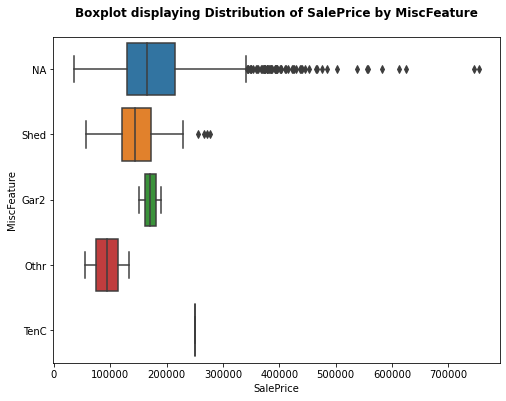

In [396]:
GranularBoxplotter('PoolQC')
GranularBoxplotter('Fence')
GranularBoxplotter('MiscFeature')

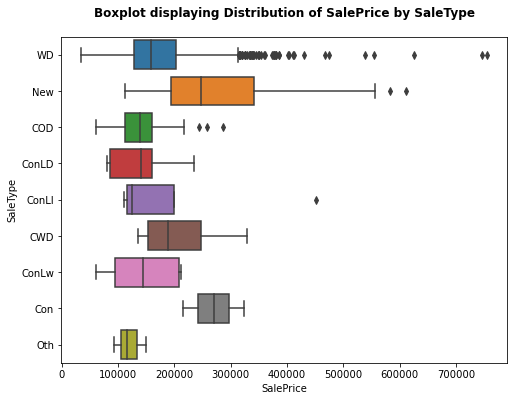

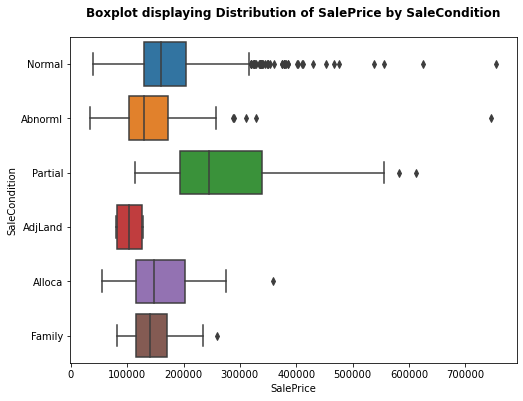

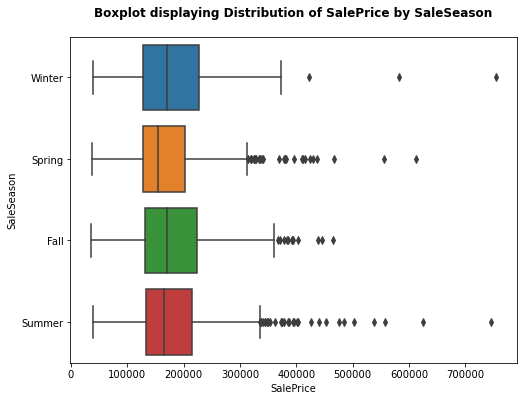

In [397]:
GranularBoxplotter('SaleType')
GranularBoxplotter('SaleCondition')
GranularBoxplotter('SaleSeason')

### Visualizations by Numerical Variables

Now we will look at the relations between the Numerical values using a correlation heatmap.

In [398]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

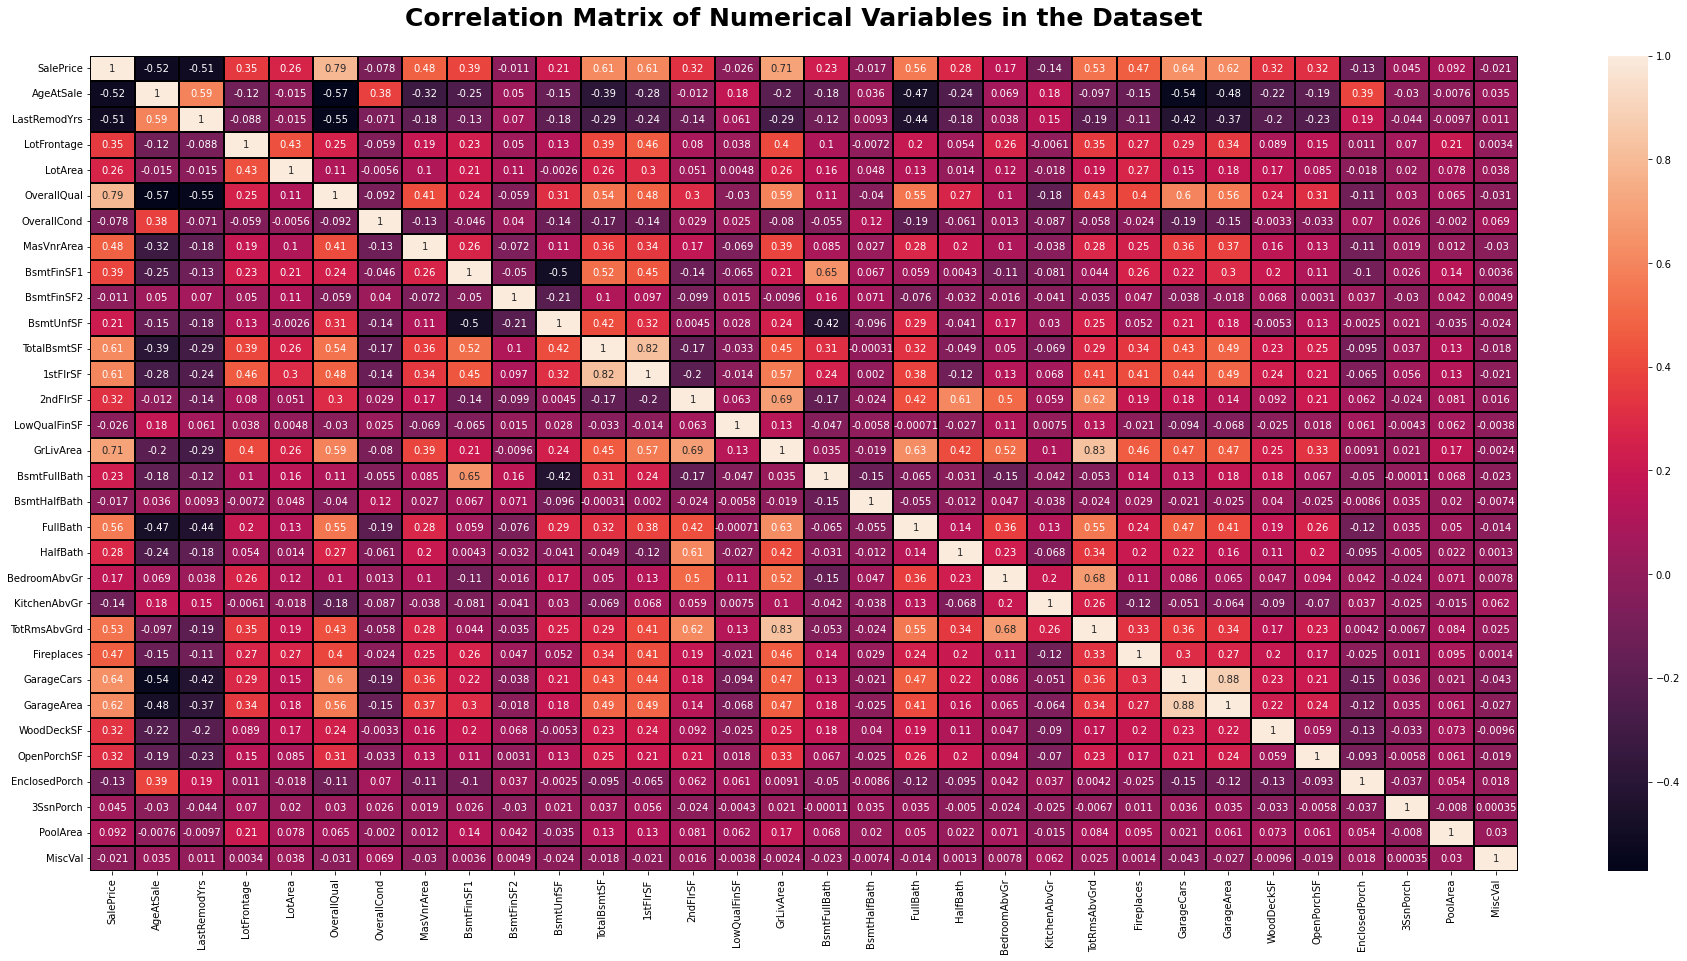

In [399]:
keynumcols = ['SalePrice','AgeAtSale','LastRemodYrs','LotFrontage',
              'LotArea','OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF' , 'TotalBsmtSF', '1stFlrSF', 
              '2ndFlrSF','LowQualFinSF','GrLivArea', 'BsmtFullBath', 
              'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 
              'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
              '3SsnPorch','PoolArea','MiscVal']
keycatcols = [x for x in list(df_train.columns) if x not in keynumcols]
plt.figure(figsize=(32,15))

sns.heatmap(df_train[keynumcols].corr(), annot=True, linewidths=2, linecolor='black') 
plt.title('Correlation Matrix of Numerical Variables in the Dataset', 
            loc = 'center', 
            fontsize = 25,
            fontweight = 'bold',
            pad = 30)

plt.show()

With this visualization presented below, we can now start to see what the key elements in a potential model might be:

***Key Correlations Numeric Variables for SalePrice:***
1. **`OverallQual`**: This had a strong positive correlation with the Sale price of a house (0.79)
2. **`GrLivArea`**: This had a strong positive correlation with the Sale price of a house (0.71)
3. **`Garage Cars`**/**`Garage Area`**: This had a moderately strong positive correlation with the sale price of a house (0.64)
4. **`TotalBsmtSF`**/**`1stFlrSF`**: This had a moderately strong positive correlation with the sale price of a house (0.61)
5. **`FullBath`**: This had a moderate positive correlation with the sale price of a house (0.56)
6. **`TotalRmsAbvGrd`**: This had a moderate positive correlation with the sale price of a house (0.53)
7. **`AgeAtSale`**: This had a moderate negative correlation with the sale price of a house (-0.52)
8. **`LastRemodYrs`**: This had a moderate negative correlation with the sale price of a house (-0.51)
9. **`Fireplaces`**: This had a moderate positive correlation with the sale price of a house (0.47)


### Preprocessing Part 2

Now that we have looked at the key data points and have an idea of any further feature engineering we want to do, we can finally move forward with preprocessing the entire dataset.

We will start with re-loading the data and merging the training and test data.

In [400]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

df = pd.concat([df_train,df_test])
dfsales = df[['Id','SalePrice']]

df.drop(columns=['SalePrice'],inplace=True)

print(df.shape)

(2919, 80)


In [401]:
# Changing the data type of MasVnrArea and GarageYrBlt as they are supposed to be numbers but are currently text
df['MasVnrArea'].replace('NA', None , inplace=True)
df['GarageYrBlt'].replace('NA', None , inplace=True)

df[['MasVnrArea','GarageYrBlt']] = df[['MasVnrArea','GarageYrBlt']].apply(pd.to_numeric)
df[['MasVnrArea','GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrArea   2896 non-null   float64
 1   GarageYrBlt  2760 non-null   float64
dtypes: float64(2)
memory usage: 68.4 KB


Once we have loaded all the data, we are going to carry out the feature engineering we discussed earlier at a global level: for both test and training data.

In [402]:
df['AgeAtSale'] = df.YrSold - df.YearBuilt
df['LastRemodYrs'] = df.YrSold - df.YearRemodAdd
df['RecessionSale'] = [1 if x in [2008,2009] else 0 for x in df['YrSold']]
df['SaleSeason'] = df.MoSold.map({12:'Winter',1:'Winter',2:'Winter',
                                              3:'Spring',4:'Spring',5:'Spring',
                                              6:'Summer',7:'Summer',8:'Summer',
                                              9:'Fall',10:'Fall',11:'Fall'})
df['IrregularLotShape'] = df['LotShape'].map(lambda x: 1 if x in ['IR1','IR2','IR3'] else 0)
df['HighValNBH'] = df['Neighborhood'].map(lambda x: 1 if x in ['NridgHt','NoRidge','StoneBr','Timber','Somerst','Veenker'] else 0)
df['LowValNBH'] = df['Neighborhood'].map(lambda x: 1 if x in ['BrkSide','Edwards','OldTown','BrDale','IDOTRR','MeadowV'] else 0)
df['Garage'] = df['GarageType'].map(lambda x: 1 if x == 'NA' else 0)

In [403]:
# FillNA Cell
# Adjustuing for variables that load as NaN but are actually entered as N/A in the excel spreadsheet

df['Fence'].fillna('NA',inplace = True)
df['Alley'].fillna('NA',inplace = True)
df['MiscFeature'].fillna('NA',inplace = True)
df['FireplaceQu'].fillna('NA',inplace = True)
df['GarageType'].fillna('NA',inplace = True)
df['BsmtFinType1'].fillna('NA',inplace = True)
df['BsmtFinType2'].fillna('NA',inplace = True)

In [404]:
# Null values in the test data set.

nulls = pd.DataFrame(pd.isnull(df).sum())
nulls.reset_index(inplace=True)
nulls.rename(columns={'index':'column', 0:'null_count'},inplace=True)
nulls = nulls[nulls['null_count'] != 0]
nulls['percent_missing'] = ["{:.2f}%".format(x/len(df)*100) for x in nulls.null_count]
nulls.sort_values(by='null_count',ascending=False)

,column,null_count,percent_missing
72,PoolQC,2909,99.66%
3,LotFrontage,486,16.65%
59,GarageYrBlt,159,5.45%
60,GarageFinish,159,5.45%
64,GarageCond,159,5.45%
63,GarageQual,159,5.45%
31,BsmtCond,82,2.81%
32,BsmtExposure,82,2.81%
30,BsmtQual,81,2.77%
25,MasVnrType,24,0.82%


As you can see, there are still a number of columns that have null values. Since this makes up a substantial amount of data and I want to preserve as much information as possible for our modelling, I used a K-Nearest Neighbors(KNN) imputer to estimate the values that are missing.

To do this I encoded the categorical values so that they have a numeric binary representation and can be recognized by the algorithm.

In [405]:
# KNN imputation for LotFrontage
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

encodecatcols = [x for x in keycatcols if x not in ['IrregularLotShape','HighValNBH', 'LowValNBH', 'YrSold',
                                                    'MoSold','YearBuilt','YearRemodAdd','Garage',
                                                    'RecessionSale','ScreenPorch']]
encodevars = df[encodecatcols]
cat_dummies = pd.get_dummies(encodevars,drop_first=True)

df.drop(encodecatcols, axis=1, inplace=True)
df = pd.concat([df, cat_dummies], axis=1)

In [406]:
imputer = KNNImputer(n_neighbors=5)
imputed_test = imputer.fit_transform(df)
df = pd.DataFrame(imputed_test, columns=df.columns)
df = df.astype({'Id':int})
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleSeason_Spring,SaleSeason_Summer,SaleSeason_Winter
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [407]:
# Null values in the test data set.

nulls = pd.DataFrame(pd.isnull(df).sum())
nulls.reset_index(inplace=True)
nulls.rename(columns={'index':'column', 0:'null_count'},inplace=True)
nulls = nulls[nulls['null_count'] != 0]
nulls['percent_missing'] = ["{:.2f}%".format(x/len(df)*100) for x in nulls.null_count]
nulls.sort_values(by='null_count',ascending=False)

,column,null_count,percent_missing


As you can see from above, all the null values in our dataset have been removed. We can now ready to move on to the implementation of the Linear Regression & Neural Network Regressor Models.

Before I started modelling, I split the two test and train datasets that was merged initially for pre-processing back to their original datasets. I used the 'Id' data point in the dataset to do this. 

In [408]:
# df = pd.concat([df,dfsales], axis=1)
df= df.merge(dfsales, left_on='Id', right_on='Id')
df.set_index('Id',inplace=True)
# df.drop(columns=['index'])
df_test = df[1460:].drop(columns=['SalePrice'], axis=1)
df_train = df[0:1460]
print(df_test.shape)
print(df_train.shape)

(1459, 262)
(1460, 263)


I also wanted to make sure I removed cases of extreme outliers that were a part of the dataset. Ideally, I would like to preserve as much data as possible, so I used an extreme version of the the InterQuartileRange identificatio method here. 

Outliers were defined as values for SalePrice that were either 3 x IQR above the 3rd Quartile or 3 x IQR below the 3rd Quartile. 

In [409]:
# figuring our outliers in Sale Price
q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
IQR = q3-q1
lower_bound = q1 - 3*IQR
upper_bound = q3 + 3*IQR

df_train.loc[(df_train['SalePrice'] > upper_bound) | 
             (df_train['SalePrice'] < lower_bound)] 

# df_train.loc[(df_train['SalePrice'] > df_train['SalePrice'].mean() + 4 * df_train['SalePrice'].std()) | 
#              (df_train['SalePrice'] < df_train['SalePrice'].mean() - 4 * df_train['SalePrice'].std())] 

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleSeason_Spring,SaleSeason_Summer,SaleSeason_Winter,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
179,63.0,17423.0,9.0,5.0,2008.0,2009.0,748.0,1904.0,0.0,312.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,501837.0
186,90.0,22950.0,10.0,9.0,1892.0,1993.0,0.0,0.0,0.0,1107.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,475000.0
441,105.0,15431.0,10.0,5.0,2008.0,2008.0,200.0,1767.0,539.0,788.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,555000.0
692,104.0,21535.0,10.0,6.0,1994.0,1995.0,1170.0,1455.0,0.0,989.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,755000.0
770,47.0,53504.0,8.0,5.0,2003.0,2003.0,603.0,1416.0,0.0,234.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,538000.0
799,104.0,13518.0,9.0,5.0,2008.0,2009.0,860.0,0.0,0.0,1926.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,485000.0
804,107.0,13891.0,9.0,5.0,2008.0,2009.0,424.0,0.0,0.0,1734.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,582933.0
899,100.0,12919.0,9.0,5.0,2009.0,2010.0,760.0,2188.0,0.0,142.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,611657.0
1047,85.0,16056.0,9.0,5.0,2005.0,2006.0,208.0,240.0,0.0,1752.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,556581.0


In [410]:
outliers = list (df_train.loc[(df_train['SalePrice'] > upper_bound) | (df_train['SalePrice'] < lower_bound)].index )
outliers

[179, 186, 441, 692, 770, 799, 804, 899, 1047, 1170, 1183, 1374]

In [411]:
for index in outliers:
    df_train['SalePrice'][index] = np.nan

c:\Users\Young Harambe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [412]:
df_train = df_train.dropna()
df_train.shape

(1448, 263)

In [413]:
print(df_train.shape)
print('We preserved {} ({:.2f}%) of the 1460 training records'.format(len(df_train),len(df_train)/1460*100))

(1448, 263)
We preserved 1448 (99.18%) of the 1460 training records


## Model Training Final Predictions

### Linear Regression Training

In [414]:
%matplotlib inline
import statsmodels.formula.api as sm
import statsmodels.api as smf
import scipy.stats as stats
import operator

In [415]:
linregvars_numeric = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','AgeAtSale','LastRemodYrs','Fireplaces',]
linregvars_binary = ['RecessionSale','IrregularLotShape','HighValNBH','LowValNBH','Garage','CentralAir_Y']
linregvars_cat = ['MSZoning_RL','Condition2_PosN','Street_Pave','RoofMatl_WdShngl','Electrical_SBrkr',
                  'KitchenQual_Fa' ,'KitchenQual_Gd', 'KitchenQual_TA','Functional_Maj2','LandContour_HLS',
                  'SaleCondition_Partial','SaleSeason_Summer','GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA']
excluded_vars = ['SalePrice','HouseStyle_1.5Unf','HouseStyle_2.5Fin',
                'HouseStyle_2.5Unf','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng',
                'Exterior2nd_Wd Shng','1stFlrSF','2ndFlrSF','Exterior2nd_Brk Cmn','3SsnPorch','RoofMatl_Tar&Grv']


#### First Iteration - All Variables with Loop to remove Insignificant Variables

In our first iteration of the linear model, I added a significant number of the predictors available to us in the data set. I then wrote a function that would iteratively exclude insignificant variables from the model (p value > 0.05).

In [416]:
# Final Regressions Model

excluded_vars =['SalePrice','HouseStyle_1.5Unf','HouseStyle_2.5Fin',
                'HouseStyle_2.5Unf','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng',
                'Exterior2nd_Wd Shng','1stFlrSF','2ndFlrSF','Exterior2nd_Brk Cmn','3SsnPorch','RoofMatl_Tar&Grv']
x_reg = df_train.drop(excluded_vars,axis=1)
y_reg = df_train.SalePrice

def remove_most_insignificant(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    max_p_value = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = max_p_value, inplace = True)
    return df

insignificant_feature = True
while insignificant_feature:
        model_final = smf.OLS(y_reg, x_reg)
        results_final = model_final.fit()
        significant = [p_value < 0.05 for p_value in results_final.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if x_reg.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results_final = None
                insignificant_feature = False
            else:            
                x_reg = remove_most_insignificant(x_reg, results_final)
print(results_final.summary())

import math
print('\n')
print('Root Mean Square Error: {:.2f}'.format(math.sqrt(results_final.mse_resid)))

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1328.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:58:20   Log-Likelihood:                         -16457.
No. Observations:                1448   AIC:                                  3.308e+04
Df Residuals:                    1363   BIC:                                  3.353e+04
Df Model:                          85                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [417]:
# Cross-Validation for Model from Iteration 1: predictors regression model
from sklearn.model_selection import KFold ## for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



kfolds_regression = KFold(n_splits = 10, random_state = 0, shuffle = True)
iteration1_model = LinearRegression()
iteration1_model_cv = cross_val_score(iteration1_model,X=x_reg, 
                                y=df_train['SalePrice'],
                                cv=kfolds_regression)
print("Linear Regression:")
print("R-squared of 10-folds:",iteration1_model_cv,"(mean R-squared:",np.mean(iteration1_model_cv),")")

Linear Regression:
R-squared of 10-folds: [0.89476107 0.76263516 0.46162817 0.87388749 0.92113675 0.79863405
 0.89752844 0.68487349 0.89777413 0.93248973] (mean R-squared: 0.8125348478658267 )


In [418]:
iteration1_xreg = x_reg.copy()

As you can see from the results, there is a high R<sup>2</sup> value however there is a multicolinearity issue with the model. I deal with this in the next iteration of code.

#### Second Iteration - Dealing with Multicollinearity

To deal with the multicollineary issue with the first iteration, I created a function that goes through the initial model and iteratively removes variables based on their Variance Inflation Factor (any variable with a VIF less than 10 was removed).

This process was continued for multiple cycles until there were no variables left with a high VIF, essentially eradicating the Multicollinearity issue.

##### Iterative Function

In [419]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import math

def LinregCycle(df_x_cols=x_reg, dropcount = 1):
    X = df_x_cols

    # Starting VIF
    global vif_data
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [vif(X.values, i) for i in range(len(X.columns))]

    global model_df
    model_df = results_final.summary2().tables[1].reset_index().rename(columns={'index':'x_variable'})
    model_df = model_df.merge(vif_data, left_on='x_variable',right_on='feature').drop(['feature'],axis=1)

    print('Model Variables with VIF greater than 10')
    display(model_df[model_df.VIF > 10].sort_values(by='VIF',ascending=False)) 

    global x_reg
    x_reg.drop(model_df[model_df.VIF > 10].\
        sort_values(by='VIF',ascending=False).\
            head(dropcount)['x_variable'],axis=1, inplace=True)
    
    print('\n')
    print('\n')      
    print(x_reg.shape)

    global vars
    vars = ''
    vars = ' + '.join(x_reg.columns)

    global model
    model = sm.ols('SalePrice ~ {}'.format(vars), data=df_train).fit()
    print(model.summary())

    # Evaluating RMSE
    print('\n')
    print('Root Mean Square Error: {:.2f}'.format(math.sqrt(model.mse_resid)))

    # Endpoint VIF
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [vif(X.values, i) for i in range(len(X.columns))]

    model_df = results_final.summary2().tables[1].reset_index().rename(columns={'index':'x_variable'})
    model_df = model_df.merge(vif_data, left_on='x_variable',right_on='feature').drop(['feature'],axis=1)

    print('\n')
    print('\n')  
    print('Model Variables with VIF greater than 10')
    display(model_df[model_df.VIF > 10].sort_values(by='VIF',ascending=False))

##### Cycle 1

In [420]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
51,RoofMatl_CompShg,84556.011186,12930.391001,6.539324,8.715713e-11,59190.385802,109921.636570,513.919542
47,RoofStyle_Gable,-87922.799039,12687.062918,-6.930115,6.467652e-12,-112811.086268,-63034.511811,395.737986
20,Street_Pave,26465.479293,8540.439503,3.098843,1.982521e-03,9711.648025,43219.310560,227.032238
18,MSZoning_RL,24960.769226,7465.472956,3.343495,8.497548e-04,10315.706265,39605.832188,137.145427
49,RoofStyle_Hip,-86114.987715,12762.982315,-6.747246,2.221381e-11,-111152.206478,-61077.768952,97.045465
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,83.743405
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,42.584167
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,39.930635
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.897297
62,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,31.613143






(1448, 84)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     163.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:23   Log-Likelihood:                -16480.
No. Observations:                1448   AIC:                         3.313e+04
Df Residuals:                    1363   BIC:                         3.358e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
20,Street_Pave,26465.479293,8540.439503,3.098843,1.982521e-03,9711.648025,43219.310560,226.025895
18,MSZoning_RL,24960.769226,7465.472956,3.343495,8.497548e-04,10315.706265,39605.832188,136.699282
47,RoofStyle_Gable,-87922.799039,12687.062918,-6.930115,6.467652e-12,-112811.086268,-63034.511811,101.415497
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,83.460183
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,42.279409
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,39.846023
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.552032
61,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,31.604989
19,MSZoning_RM,20630.709420,7539.180989,2.736466,6.290964e-03,5841.052970,35420.365870,26.572067
49,RoofStyle_Hip,-86114.987715,12762.982315,-6.747246,2.221381e-11,-111152.206478,-61077.768952,25.624355


##### Cycle 2

In [421]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
20,Street_Pave,26465.479293,8540.439503,3.098843,1.982521e-03,9711.648025,43219.310560,226.025895
18,MSZoning_RL,24960.769226,7465.472956,3.343495,8.497548e-04,10315.706265,39605.832188,136.699282
47,RoofStyle_Gable,-87922.799039,12687.062918,-6.930115,6.467652e-12,-112811.086268,-63034.511811,101.415497
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,83.460183
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,42.279409
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,39.846023
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.552032
61,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,31.604989
19,MSZoning_RM,20630.709420,7539.180989,2.736466,6.290964e-03,5841.052970,35420.365870,26.572067
49,RoofStyle_Hip,-86114.987715,12762.982315,-6.747246,2.221381e-11,-111152.206478,-61077.768952,25.624355






(1448, 83)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     164.7
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:27   Log-Likelihood:                -16485.
No. Observations:                1448   AIC:                         3.314e+04
Df Residuals:                    1364   BIC:                         3.358e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
18,MSZoning_RL,24960.769226,7465.472956,3.343495,8.497548e-04,10315.706265,39605.832188,112.814766
46,RoofStyle_Gable,-87922.799039,12687.062918,-6.930115,6.467652e-12,-112811.086268,-63034.511811,94.565345
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,81.046059
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,41.518987
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,39.599613
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.461374
60,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,30.163346
48,RoofStyle_Hip,-86114.987715,12762.982315,-6.747246,2.221381e-11,-111152.206478,-61077.768952,23.899991
19,MSZoning_RM,20630.709420,7539.180989,2.736466,6.290964e-03,5841.052970,35420.365870,22.611127
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.925258


##### Cycle 3

In [422]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
18,MSZoning_RL,24960.769226,7465.472956,3.343495,8.497548e-04,10315.706265,39605.832188,112.814766
46,RoofStyle_Gable,-87922.799039,12687.062918,-6.930115,6.467652e-12,-112811.086268,-63034.511811,94.565345
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,81.046059
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,41.518987
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,39.599613
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.461374
60,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,30.163346
48,RoofStyle_Hip,-86114.987715,12762.982315,-6.747246,2.221381e-11,-111152.206478,-61077.768952,23.899991
19,MSZoning_RM,20630.709420,7539.180989,2.736466,6.290964e-03,5841.052970,35420.365870,22.611127
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.925258






(1448, 82)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:31   Log-Likelihood:                -16495.
No. Observations:                1448   AIC:                         3.316e+04
Df Residuals:                    1365   BIC:                         3.359e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
45,RoofStyle_Gable,-87922.799039,12687.062918,-6.930115,6.467652e-12,-112811.086268,-63034.511811,85.509182
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,74.635932
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,41.145093
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,38.358306
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.438298
59,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.740925
47,RoofStyle_Hip,-86114.987715,12762.982315,-6.747246,2.221381e-11,-111152.206478,-61077.768952,21.866419
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.668693
20,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,20.466528
9,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,19.990931


##### Cycle 4

In [423]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
45,RoofStyle_Gable,-87922.799039,12687.062918,-6.930115,6.467652e-12,-112811.086268,-63034.511811,85.509182
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,74.635932
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,41.145093
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,38.358306
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.438298
59,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.740925
47,RoofStyle_Hip,-86114.987715,12762.982315,-6.747246,2.221381e-11,-111152.206478,-61077.768952,21.866419
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.668693
20,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,20.466528
9,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,19.990931






(1448, 81)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:35   Log-Likelihood:                -16497.
No. Observations:                1448   AIC:                         3.316e+04
Df Residuals:                    1366   BIC:                         3.359e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,68.535215
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,39.577324
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,37.697423
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.332396
58,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.471692
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.633266
20,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.895101
9,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,19.878043
72,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,17.555151
70,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.969403


##### Cycle 5

In [424]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
2,OverallQual,7878.924819,832.071850,9.469044,1.197528e-20,6246.644493,9511.205145,68.535215
8,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,39.577324
3,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,37.697423
6,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,36.332396
58,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.471692
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.633266
20,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.895101
9,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,19.878043
72,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,17.555151
70,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.969403






(1448, 80)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     155.5
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:38   Log-Likelihood:                -16548.
No. Observations:                1448   AIC:                         3.326e+04
Df Residuals:                    1367   BIC:                         3.369e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
7,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,39.564764
2,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,34.391579
5,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,30.775740
57,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.321846
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.366844
19,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.561049
8,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,19.392381
69,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.961757
60,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,16.576959
71,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,16.572171


##### Cycle 6

In [425]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
7,KitchenAbvGr,-10295.527803,3449.458321,-2.984680,2.889325e-03,-17062.350828,-3528.704778,39.564764
2,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,34.391579
5,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,30.775740
57,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.321846
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.366844
19,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.561049
8,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,19.392381
69,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.961757
60,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,16.576959
71,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,16.572171






(1448, 79)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:42   Log-Likelihood:                -16554.
No. Observations:                1448   AIC:                         3.327e+04
Df Residuals:                    1368   BIC:                         3.369e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
2,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,34.372270
5,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,28.362982
56,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.270593
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.271139
18,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.462679
7,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,18.936120
68,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.673701
70,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,16.344669
59,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,16.277905
55,ExterQual_Gd,-9896.521867,3890.824640,-2.543554,1.108279e-02,-17529.175841,-2263.867893,14.494135


##### Cycle 7

In [426]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
2,OverallCond,4894.522917,628.553976,7.786957,1.350369e-14,3661.484822,6127.561012,34.372270
5,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,28.362982
56,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,28.270593
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.271139
18,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.462679
7,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,18.936120
68,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.673701
70,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,16.344669
59,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,16.277905
55,ExterQual_Gd,-9896.521867,3890.824640,-2.543554,1.108279e-02,-17529.175841,-2263.867893,14.494135






(1448, 78)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:45   Log-Likelihood:                -16603.
No. Observations:                1448   AIC:                         3.336e+04
Df Residuals:                    1369   BIC:                         3.378e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
4,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,28.298550
55,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,27.956151
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.076836
17,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.210127
6,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,18.914285
67,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.613522
58,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,16.006318
69,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,15.191009
54,ExterQual_Gd,-9896.521867,3890.824640,-2.543554,1.108279e-02,-17529.175841,-2263.867893,14.392224
10,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,12.379717


##### Cycle 8

In [427]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
4,GrLivArea,51.191159,2.169707,23.593582,1.756529e-103,46.934832,55.447487,28.298550
55,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,27.956151
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,20.076836
17,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.210127
6,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,18.914285
67,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.613522
58,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,16.006318
69,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,15.191009
54,ExterQual_Gd,-9896.521867,3890.824640,-2.543554,1.108279e-02,-17529.175841,-2263.867893,14.392224
10,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,12.379717






(1448, 77)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     97.61
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:48   Log-Likelihood:                -16869.
No. Observations:                1448   AIC:                         3.389e+04
Df Residuals:                    1370   BIC:                         3.431e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
54,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,27.691216
16,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.135550
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,18.516038
5,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,17.390135
66,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.590147
57,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,15.995332
68,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,15.030389
53,ExterQual_Gd,-9896.521867,3890.824640,-2.543554,1.108279e-02,-17529.175841,-2263.867893,14.092587
9,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.890326
65,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,11.411739


##### Cycle 9

In [428]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
54,ExterQual_TA,-13400.577937,4020.581116,-3.332995,8.822077e-04,-21287.775966,-5513.379908,27.691216
16,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,19.135550
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,18.516038
5,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,17.390135
66,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,16.590147
57,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,15.995332
68,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,15.030389
53,ExterQual_Gd,-9896.521867,3890.824640,-2.543554,1.108279e-02,-17529.175841,-2263.867893,14.092587
9,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.890326
65,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,11.411739






(1448, 76)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     98.73
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:52   Log-Likelihood:                -16870.
No. Observations:                1448   AIC:                         3.389e+04
Df Residuals:                    1371   BIC:                         3.430e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
16,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,18.659394
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,18.312774
5,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,17.302165
56,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.997143
65,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.825350
67,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,14.604260
9,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.706293
64,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.515255
10,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.328678
55,BsmtQual_Gd,-22854.481407,2920.259225,-7.826182,1.002615e-14,-28583.171399,-17125.791414,10.123365


##### Cycle 10

In [429]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
16,LandContour_Lvl,9575.504074,2724.923550,3.514045,4.557810e-04,4230.005243,14921.002905,18.659394
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,18.312774
5,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,17.302165
56,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.997143
65,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.825350
67,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,14.604260
9,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.706293
64,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.515255
10,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.328678
55,BsmtQual_Gd,-22854.481407,2920.259225,-7.826182,1.002615e-14,-28583.171399,-17125.791414,10.123365






(1448, 75)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     99.84
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:55   Log-Likelihood:                -16872.
No. Observations:                1448   AIC:                         3.390e+04
Df Residuals:                    1372   BIC:                         3.430e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,17.995481
5,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,17.154246
55,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.715409
64,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.467137
66,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,14.435196
9,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.670984
63,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.361656
10,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.295571


##### Cycle 11

In [430]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
0,LotFrontage,-95.647159,35.357897,-2.705114,6.913156e-03,-165.008958,-26.285360,17.995481
5,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,17.154246
55,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.715409
64,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.467137
66,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,14.435196
9,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.670984
63,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.361656
10,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.295571






(1448, 74)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:58   Log-Likelihood:                -16872.
No. Observations:                1448   AIC:                         3.389e+04
Df Residuals:                    1373   BIC:                         3.429e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
4,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,15.724089
54,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.565183
65,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,14.255893
63,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.246050
8,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.636256
9,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.288515
62,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.259255


##### Cycle 12

In [431]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
4,GarageCars,10611.400554,1335.503130,7.945620,4.016416e-15,7991.536073,13231.265034,15.724089
54,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.565183
65,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,14.255893
63,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.246050
8,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.636256
9,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.288515
62,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.259255






(1448, 73)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     94.36
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:59:01   Log-Likelihood:                -16923.
No. Observations:                1448   AIC:                         3.399e+04
Df Residuals:                    1374   BIC:                         3.439e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
53,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.542737
62,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.081731
64,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,13.880534
7,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.635028
61,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.106722
8,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.071973


##### Cycle 13

In [432]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
53,BsmtQual_TA,-22976.440603,3503.099338,-6.558889,7.676226e-11,-29848.491532,-16104.389675,14.542737
62,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,14.081731
64,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,13.880534
7,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,11.635028
61,KitchenQual_Gd,-19705.526260,3069.374479,-6.420046,1.876475e-10,-25726.736539,-13684.315981,10.106722
8,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.071973






(1448, 72)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     88.65
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:59:03   Log-Likelihood:                -16970.
No. Observations:                1448   AIC:                         3.409e+04
Df Residuals:                    1375   BIC:                         3.447e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
63,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,13.360716
61,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,11.887933
8,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.067972
7,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,10.006938


##### Cycle 14

In [433]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
63,Functional_Typ,11141.962379,2481.848654,4.489380,7.745644e-06,6273.305026,16010.619732,13.360716
61,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,11.887933
8,HighValNBH,16077.352839,4263.260896,3.771140,1.694597e-04,7714.088435,24440.617244,10.067972
7,AgeAtSale,-285.036925,44.864066,-6.353346,2.865361e-10,-373.047031,-197.026819,10.006938






(1448, 71)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     89.95
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:59:06   Log-Likelihood:                -16970.
No. Observations:                1448   AIC:                         3.408e+04
Df Residuals:                    1376   BIC:                         3.446e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
61,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,11.058171


##### Cycle 15

In [434]:
LinregCycle()

Model Variables with VIF greater than 10


,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF
61,KitchenQual_TA,-22298.316803,3364.487626,-6.627552,4.902526e-11,-28898.452307,-15698.181298,11.058171






(1448, 70)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     79.38
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:59:09   Log-Likelihood:                -17052.
No. Observations:                1448   AIC:                         3.425e+04
Df Residuals:                    1377   BIC:                         3.462e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept        

,x_variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],VIF


In [435]:
kfolds_regression = KFold(n_splits = 10, random_state = 0, shuffle = True)
iteration2_model = LinearRegression()
iteration2_model_cv = cross_val_score(iteration2_model,X=x_reg, 
                                y=df_train['SalePrice'],
                                cv=kfolds_regression)
print("Linear Regression:")
print("R-squared of 10-folds:",iteration2_model_cv,"(mean R-squared:",np.mean(iteration2_model_cv),")")

Linear Regression:
R-squared of 10-folds: [0.78130263 0.75191401 0.51593773 0.77031781 0.76835496 0.77046779
 0.75919358 0.69795925 0.7220501  0.80731457] (mean R-squared: 0.7344812445348717 )


After 15 cycles, I was able to get rid of all the variables that had a VIF higher than 10. This significantly reduced the R<sup>2</sup> value of the model and the RMSE of th however, we maintained the integrity of the model.

### Linear Regression Final Model Predictions

Now that I have trained two separate models, they are ready to generate predictions on the test set provided by kaggle that are to be submitted to the competition.

In [436]:
test_index = pd.DataFrame(df_test.index)

In [437]:
iteration1_xvars = list(iteration1_xreg.columns)
iteration1_xvars = [x for x in list(df_test.columns) if x in iteration1_xvars]

In [438]:
iteration1_model = LinearRegression()
iteration1_model.fit(X=iteration1_xreg[iteration1_xvars], y=df_train['SalePrice'])

I1_preds = iteration1_model.predict(df_test[iteration1_xvars])
res_I1 = pd.DataFrame(I1_preds)
res_I1.columns = ['SalePrice']

df_submission = pd.concat([test_index,res_I1], axis=1)
df_submission.to_csv('Linreg_Iteration1_Predictions.csv',index=False)

In [439]:
iteration2_xvars = list(x_reg.columns) 
# - ['RoofMatl_Membran', 'GarageQual_Fa', 'PoolQC_Fa', 'MiscFeature_TenC']
iteration2_xvars = [x for x in list(df_test.columns) if x in iteration2_xvars]


In [440]:
iteration2_model = LinearRegression()
iteration2_model.fit(X=x_reg[iteration2_xvars], y=df_train['SalePrice'])


I2_preds = iteration2_model.predict(df_test[iteration2_xvars])
res_I2 = pd.DataFrame(I2_preds)
res_I2.columns = ['SalePrice']

df_submission = pd.concat([test_index,res_I2], axis=1)
df_submission.to_csv('Linreg_Iteration2_Predictions.csv',index=False)


### Neural Network Regressor

Now I will attempt to train a neural network regressor to try and predict the house prices. Since the data has already been processed, the first task will be to split the training data further into a validation and test set (X_train, X_test, y_train, y_test) in order to develop the model.

In [441]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
import numpy as np

In [442]:
# fix random seed for reproducibility
np.random.seed(42)

y = df_train["SalePrice"].values
X = df_train.drop(["SalePrice"], axis = 1).values
X_valid = df_test.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

The next stop is to build the structure of the neural network. The base structure I decided to go with included 4 Dense Layers (each with 128, 64, 32 and 1 Neurons respectively) and 2 Dropout Layers(with a starting rate of 0.3).  

To do this, I must set a base level network architecture and then train the hyperparameters appropriately. Typically you can train a number of different hyperparameters with a neural network however, the ones I will be focusing on here are as follows:
- Activation Function
- Weight Initializations
- Optimizer Function
- Batch Size
- Number of Epochs
- Dropout Rate
- Learning Rate

##### Hypertuning Activation

In [443]:
def buildModel(activation):
    # Initialising the ANN
    regressor = Sequential()
    
    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = 128, input_dim = X.shape[1], activation = activation))
    regressor.add(Dropout(0.3))
    # Adding the second hidden layer
    regressor.add(Dense(units = 64, input_dim = X.shape[1], activation = activation))
    
    
    regressor.add(Dense(units = 32, input_dim = X.shape[1], activation = activation))
    regressor.add(Dropout(0.3))
    # Adding the output layer
    regressor.add(Dense(units = 1, activation = 'softplus'))
    

    # Compiling the ANN
    regressor.compile(loss='mse', optimizer='adam', metrics=['mae'])
    
    return regressor

seed = 42
np.random.seed(seed)

predictor = KerasRegressor(build_fn = buildModel, epochs = 150, batch_size=40)

parameters = {'activation': ['relu','selu','elu']}
grid_search = GridSearchCV(estimator = predictor,
                           param_grid = parameters,
                           cv = 3)
grid_result = grid_search.fit(X_train, y_train, verbose = 0)

386/386 [==============================] - 0s 118us/step


In [444]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best: -1393101770.721934 using {'activation': 'selu'}
Mean = -1531036041.727116 (std=307507326.280523) with: {'activation': 'relu'}
Mean = -1393101770.721934 (std=413280812.989774) with: {'activation': 'selu'}
Mean = -1445548575.613126 (std=374517886.994577) with: {'activation': 'elu'}


##### Tuning Weight Initializations

In [445]:
def buildModel(init_mode):
    # Initialising the ANN
    regressor = Sequential()
    
    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = 128, kernel_initializer=init_mode, input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(0.3))
    # Adding the second hidden layer
    regressor.add(Dense(units = 64, kernel_initializer=init_mode, input_dim = X.shape[1], activation = 'selu'))
    
    
    regressor.add(Dense(units = 32, kernel_initializer=init_mode, input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(0.3))
    # Adding the output layer
    regressor.add(Dense(units = 1, kernel_initializer=init_mode, activation = 'softplus'))
    

    # Compiling the ANN
    regressor.compile(loss='mse', optimizer='adam', metrics=['mae'])
    
    return regressor

seed = 42
np.random.seed(seed)

predictor = KerasRegressor(build_fn = buildModel)

parameters = {'init_mode': ['uniform', 'lecun_uniform','lecun_normal', 'normal', 'zero', 
                             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']}
grid_search = GridSearchCV(estimator = predictor,
                           param_grid = parameters,
                           cv = 3)
grid_result = grid_search.fit(X_train, y_train, verbose = 0)


386/386 [==============================] - 0s 142us/step


In [446]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best: -31179405094.466320 using {'init_mode': 'he_uniform'}
Mean = -37421372410.694305 (std=1192647398.901741) with: {'init_mode': 'uniform'}
Mean = -34572250914.929192 (std=1365646881.084908) with: {'init_mode': 'lecun_uniform'}
Mean = -35457217727.005180 (std=2205451363.095845) with: {'init_mode': 'lecun_normal'}
Mean = -37416037908.338516 (std=1358710219.926965) with: {'init_mode': 'normal'}
Mean = -38069813060.531952 (std=1208742188.986371) with: {'init_mode': 'zero'}
Mean = -32982248018.238342 (std=1126799948.264702) with: {'init_mode': 'glorot_normal'}
Mean = -34103563103.060444 (std=1189429509.365433) with: {'init_mode': 'glorot_uniform'}
Mean = -32409945841.409328 (std=2685065735.915584) with: {'init_mode': 'he_normal'}
Mean = -31179405094.466320 (std=3362710990.937613) with: {'init_mode': 'he_uniform'}


##### Hypertuning Optimizer

In [447]:
def buildModel(optimizer):
    # Initialising the ANN
    regressor = Sequential()
    
    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = 128, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(0.3))
    # Adding the second hidden layer
    regressor.add(Dense(units = 64, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    
    
    regressor.add(Dense(units = 32, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(0.3))
    # Adding the output layer
    regressor.add(Dense(units = 1, kernel_initializer='he_uniform', activation = 'softplus'))
    

    # Compiling the ANN
    regressor.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    return regressor

seed = 42
np.random.seed(seed)

predictor = KerasRegressor(build_fn = buildModel, epochs = 150, batch_size=40)


parameters = {'optimizer': ['SGD','Adadelta','RMSprop','Adagrad','Adam','Nadam']}
grid_search = GridSearchCV(estimator = predictor,
                           param_grid = parameters,
                           cv = 3)
grid_result = grid_search.fit(X_train, y_train, verbose = 0)

386/386 [==============================] - 0s 161us/step


c:\Users\Young Harambe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [            nan -1.49869907e+09 -1.55329043e+09 -1.59847739e+09
 -1.35323259e+09 -1.66543583e+09]
  category=UserWarning,


In [448]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best: -1353232590.259067 using {'optimizer': 'Adam'}
Mean = nan (std=nan) with: {'optimizer': 'SGD'}
Mean = -1498699068.352332 (std=478885966.966535) with: {'optimizer': 'Adadelta'}
Mean = -1553290432.221071 (std=430508127.259370) with: {'optimizer': 'RMSprop'}
Mean = -1598477390.701209 (std=396126196.871735) with: {'optimizer': 'Adagrad'}
Mean = -1353232590.259067 (std=226892557.692635) with: {'optimizer': 'Adam'}
Mean = -1665435828.614853 (std=867101651.161151) with: {'optimizer': 'Nadam'}


##### Tuning Batch Size & Epoch

In [450]:
def buildModel():
    # Initialising the ANN
    regressor = Sequential()
    
    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = 128, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(0.3))
    # Adding the second hidden layer
    regressor.add(Dense(units = 64, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    
    
    regressor.add(Dense(units = 32, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(0.3))
    # Adding the output layer
    regressor.add(Dense(units = 1, kernel_initializer='he_uniform', activation = 'softplus'))

    optimizer = tf.keras.optimizers.Adam()
    # Compiling the ANN
    regressor.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    return regressor

seed = 42
np.random.seed(seed)

predictor = KerasRegressor(build_fn = buildModel)

parameters = {'batch_size': [10, 20, 40, 60],
              'epochs': [10, 30, 50, 100, 150,200,300]}
grid_search = GridSearchCV(estimator = predictor,
                           param_grid = parameters,
                           cv = 3)
grid_result = grid_search.fit(X_train, y_train, verbose = 0)

386/386 [==============================] - 0s 168us/step


In [451]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best: -1203956595.039724 using {'batch_size': 10, 'epochs': 150}
Mean = -2215000024.096718 (std=316528913.776137) with: {'batch_size': 10, 'epochs': 10}
Mean = -1713314249.257340 (std=286474620.418245) with: {'batch_size': 10, 'epochs': 30}
Mean = -1566661732.587219 (std=319616436.667019) with: {'batch_size': 10, 'epochs': 50}
Mean = -1426659827.868739 (std=141278653.711746) with: {'batch_size': 10, 'epochs': 100}
Mean = -1203956595.039724 (std=331312717.953753) with: {'batch_size': 10, 'epochs': 150}
Mean = -1254585392.414508 (std=167719119.981607) with: {'batch_size': 10, 'epochs': 200}
Mean = -1989928298.058722 (std=482784280.112920) with: {'batch_size': 10, 'epochs': 300}
Mean = -2978442243.758204 (std=198333615.065577) with: {'batch_size': 20, 'epochs': 10}
Mean = -1747131946.777202 (std=324791537.022736) with: {'batch_size': 20, 'epochs': 30}
Mean = -1505523823.253886 (std=426198053.032625) with: {'batch_size': 20, 'epochs': 50}
Mean = -1402429464.207254 (std=372327319.376561) wi

##### Tuning Dropout Rate & Learning Rate

In [452]:
def buildModel(dropout, lr):
    # Initialising the ANN
    regressor = Sequential()
    
    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = 128, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(dropout))
    # Adding the second hidden layer
    regressor.add(Dense(units = 64, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    
    
    regressor.add(Dense(units = 32, kernel_initializer='he_uniform', input_dim = X.shape[1], activation = 'selu'))
    regressor.add(Dropout(dropout))
    # Adding the output layer
    regressor.add(Dense(units = 1, kernel_initializer='he_uniform', activation = 'softplus'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # Compiling the ANN
    regressor.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    return regressor

seed = 42
np.random.seed(seed)

predictor = KerasRegressor(build_fn = buildModel)

parameters = {'dropout': [0.1, 0.2, 0.3, 0.4],
              'lr': [0.0001, 0.001, 0.01, 0.1]}
grid_search = GridSearchCV(estimator = predictor,
                           param_grid = parameters,
                           cv = 3)
grid_result = grid_search.fit(X_train, y_train, epochs = 150, batch_size=10, verbose = 0)

386/386 [==============================] - 0s 157us/step


In [453]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best: -1006697655.129534 using {'dropout': 0.2, 'lr': 0.001}
Mean = -1535489166.977547 (std=325155859.635226) with: {'dropout': 0.1, 'lr': 0.0001}
Mean = -1035434788.808290 (std=299337246.068372) with: {'dropout': 0.1, 'lr': 0.001}
Mean = -1069213070.037997 (std=344178930.550909) with: {'dropout': 0.1, 'lr': 0.01}
Mean = -27039954625.658031 (std=14465134391.521349) with: {'dropout': 0.1, 'lr': 0.1}
Mean = -1628036555.937824 (std=374044584.731268) with: {'dropout': 0.2, 'lr': 0.0001}
Mean = -1006697655.129534 (std=235840537.097125) with: {'dropout': 0.2, 'lr': 0.001}
Mean = -2081020615.488774 (std=511312110.162699) with: {'dropout': 0.2, 'lr': 0.01}
Mean = -16303503198.618307 (std=16534221960.490625) with: {'dropout': 0.2, 'lr': 0.1}
Mean = -1684597692.739206 (std=367701758.576960) with: {'dropout': 0.3, 'lr': 0.0001}
Mean = -1149041940.932643 (std=229472993.483033) with: {'dropout': 0.3, 'lr': 0.001}
Mean = -2744378260.449050 (std=861978605.674882) with: {'dropout': 0.3, 'lr': 0.01}
Me

Now that all the relevant hyperparameters have been tuned and the variables have been set, I can create and evaluate the final model. The final model includes the following parameters:

- `Activation Function`: **Scaled Exponential Linear Unit (SELU)** 
- `Weight Initializations`: **He Normalization (he_uniform)**
- `Optimizer Function`: **Adam**
- `Batch Size`: **10**
- `Number of Epochs`: **150**
- `Dropout Rate`: **0.2**
- `Learning Rate`: **0.001**

With the tuning of these key hyperparameters, the model can now be created and predictions can be made. The code below does this:

Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2004 (Dense)           (None, 128)               33664     
_________________________________________________________________
dropout_1001 (Dropout)       (None, 128)               0         
_________________________________________________________________
dense_2005 (Dense)           (None, 64)                8256      
_________________________________________________________________
dense_2006 (Dense)           (None, 32)                2080      
_________________________________________________________________
dropout_1002 (Dropout)       (None, 32)                0         
_________________________________________________________________
dense_2007 (Dense)           (None, 1)                 33        
Total params: 44,033
Trainable params: 44,033
Non-trainable params: 0
________________________________________________

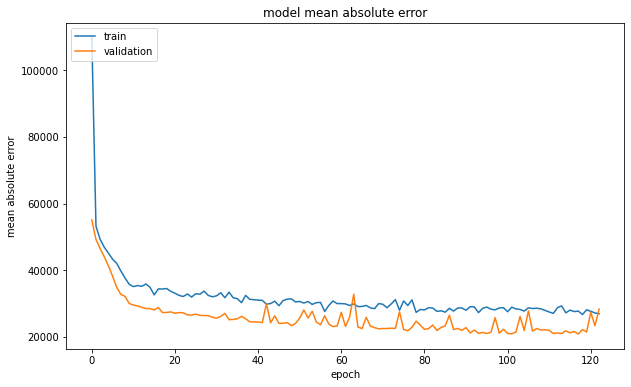

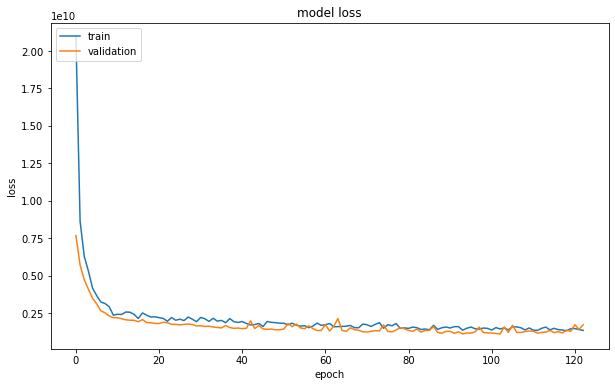

290/290 [==============================] - 0s 58us/step
Loss:  570970906.262069
Mean absolute error:  17143.94921875


In [459]:
# Neural network 

modnn = Sequential()
# modnn.add(Dense(256,  kernel_initializer='he_uniform', input_dim = X.shape[1], activation='selu'))
modnn.add(Dense(128, kernel_initializer='he_uniform', input_dim = X.shape[1], activation='selu'))
modnn.add(Dropout(0.2))
modnn.add(Dense(64,  kernel_initializer='he_uniform', input_dim = X.shape[1], activation='selu'))
modnn.add(Dense(32,  kernel_initializer='he_uniform', input_dim = X.shape[1], activation='selu'))
modnn.add(Dropout(0.2))
modnn.add(Dense(1,  kernel_initializer='he_uniform', activation = 'softplus'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

modnn.summary()

modnn.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = modnn.fit(X_train, y_train, 
                    epochs=150, batch_size=10,validation_split=0.2,callbacks = [early_stopping_cb])

plt.figure(figsize=(10,6))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

loss, mae = modnn.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Mean absolute error: ', mae)

In [458]:
y_pred = modnn.predict(X_valid)
NN_preds = pd.DataFrame(y_pred,columns=['SalePrice'])
NN_preds = pd.concat([pd.DataFrame(X_valid.index), NN_preds],axis=1)
NN_preds.to_csv('NeuralNetwork_Final_predictions.csv',index=False)

## Conclusion

After submission to the competition on kaggle, the best trained Neural Network I submitted had a RMSE (0.16848) than the best trained Linear Regression Model I submitted (0.17266).

The fact that there is not a huge difference in performance might suggest two things:
- My Neural Network Regressor model could use even more training/optimization.
- For simple tasks, there might not be that much marginal predictive power in using a Artificial Neural Network over a traditional linear regression model.